### Решение модельного уравнения

Необходимо решить модельное уравнение:
$$
\begin{align}
\label{eq:dalq}
u'(t) = \lambda u(t)
\end{align}
$$
с начальным условием $u(0) = 1$ с помошью явного и неявного метода Эйлера. Считать, что $\lambda = -200$. Провести расчеты на сетке с числом узлов $N = 1001; 101; 100$. Построить графики решения на одном рисунке, объяснить результат. А именно объяснить, что мы видим на графике для каждого случая, какое это имеет отношение к А-устойчивости, почему именно так. Если поведение графиков отличается, объяснить чем вызвано отличие.

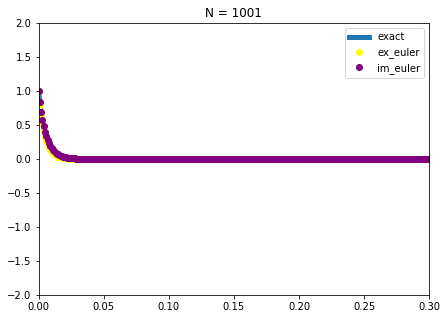

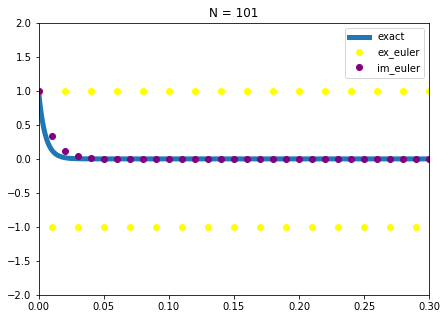

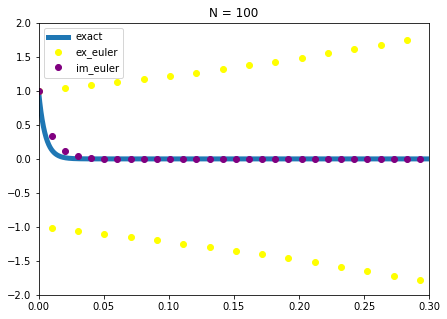

In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#для модельного уравнения
#explicit Euler method
def ex_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = (1+l*h)*u[i]

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        # TODO : реализуйте неявный метод Эйлера для модельного уравнения
        u[i+1] = u[i]/(1-l*h)
        # реализовал

T = 1 # считае до этого момента
N = [1001, 101, 100]


for i in range(len(N)):
    h = T/(N[i]-1)
    x = np.linspace(0,T,N[i]) # сетка
    x_teor = np.linspace(0,T,(N[i]-1)*100+1) # сетка для точного решения
    l = -200   
    
    u = np.zeros(N[i])
    u[0] = 1 #начальное условие для явного метода
    u1 = np.zeros(N[i])
    u1[0] = 1 #начальное условие для неявного метода 
    
    ex_euler(u, l, h, N[i])
    im_euler(u1, l, h, N[i])
    
    fig = plt.figure(figsize=(7,5))
    plt.plot(x_teor, np.exp(l*x_teor), linewidth=5.0, label='exact')
    plt.plot(x, u, 'o', label='ex_euler', c='yellow')
    plt.plot(x, u1, 'o', label='im_euler', c='purple')
    title = 'N = ' + str(N[i])
    plt.title(title)
    plt.legend()
    plt.axis([0, 0.3, -2, 2])

$\cdot$ Полученные результаты объясняются понятием $A$-устойчивости и области устойчивости методов. 

$\cdot$ На семинаре доказали, что неявный метод $A$-усточив (область устойчивости - вся комплексная плоскость кроме круга радиуса 1 с центром в точке (1;0), для $A$-устойчивости достаточно, чтобы в область входила только левая полуплоскость) $\Rightarrow$ а значит не зависит от выбора сеточного шага, в чём мы и убеждаемся смотря на графики (неявный метод сходится к точному решению).

$\cdot$ Явный метод Эйлера не является $A$-усточивым (область устойчивости - круг радиуса 1 с центром в точке (-1;0), а значит сходимость будет зависеть от шага). 

При $N = 1001$ функция устойчивости (зависит от шага, а шаг от $N$) попадает внутрь этого круга - наблюдается сходимость.

При $N = 101$ функция устойчивости попадает на границу этого круга - наблюдается ни сходимость, ни расходимость. Связано это с тем, что локальная ошибка не убывает, а остаётся постоянной.  

При $N = 100$ функция устойчивости попадает за этот круг - наблюдается расходимость. Связано это с тем, что локаьная ошибка растёт с каждым шагом.  

### L-устойчивость

Рассматриваем задачу $u' = l(u-cos(t)) - sin(t)$. Для начального условия $u(0) = 1$ решение $u(t) = cos(t)$. Для начального условия  $u(0) = g$ решение $u(t) = e^{lt}(g-1) + cos(t)$. Решите задачу на сетке с шагом $h = 0.1$ для начального условия $u(0) = 1$ и $u(0) = 1.5$ методом Эйлера и методом трапеции. В качестве решения постройте две картинки для разных начальных условий. На каждой картинке должно быть два графика для каждого из методов и сравнение с точным решением. Объясните получившиеся результаты. Как они согласуются с теорией? При чем тут L-устойчивость? 

Метод трапеции $$ \frac{u_{n+1} - u_n}{h} = \frac{f(t_n, u_n)+f(t_{n+1}, u_{n+1})}{2}. $$


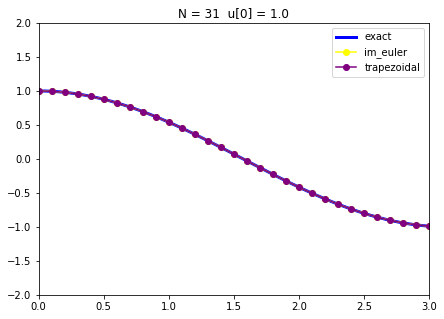

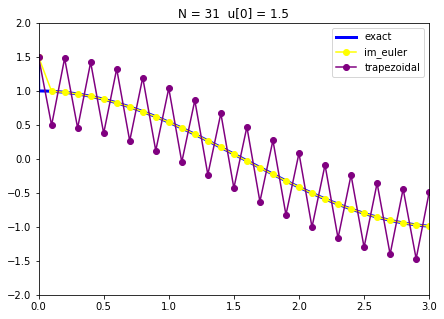

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        # TODO : реализуйте неявный метод Эйлера для модельного уравнения
        u[i+1] = (u[i]-h*(l*np.cos((i+1)*h)+np.sin((i+1)*h)))/(1-h*l)
        # реализовал

#trapezoidal method
def trapezoidal(u, l, h, N):
    for i in range(0, N-1):
        free = l*(np.cos((i+1)*h)+np.cos(i*h))+(np.sin((i+1)*h)+np.sin(i*h))
        u[i+1] = (u[i]*(1+l*h/2)-h/2*free)/(1-l*h/2)

T = 3
N = 31
h = T/(N-1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -1e6


for i in range(2):
    u = np.zeros(N)
    #initial condition
    u[0] = 1+0.5*i #genius
    u1 = np.zeros(N)
    #initial condition
    u1[0] = 1+0.5*i
    
    im_euler(u, l, h, N)
    trapezoidal(u1, l, h, N)
    fig = plt.figure(figsize=(7,5))
    plt.plot(x_teor, np.cos(x_teor)+(u[0]-1)*np.exp(l*x_teor), 'blue', linewidth=3.0, label='exact')
    plt.plot(x, u, '-o', label='im_euler', c='yellow')
    plt.plot(x, u1, '-o', label='trapezoidal', c='purple')
    title = 'N = ' + str(N) + '  u[0] = ' + str(u[0])
    plt.title(title)
    plt.legend()
    plt.axis([0, 3, -2, 2])

$\cdot$ Полученные результаты объясняются понятием $L$-устойчивости методов. Ведь даже при том, что методы $A$-устойчивы, решение всё равно может осцилировать. Из-за того, что функция устойчивости по модулю близка к единице, хоть и меньше неё. В этом случае с каждом новым шагом уменьшение локальной ошибки происходит медленно (что-то похожее было в предыдущем задании, когда мы наблюдали "параллельные линии", там значение $R(z)$ было в точности равно единице). На семинаре сделали вывод, что сходимость может зависеть теперь не только от шага сетки, а и от начальных условий. Проверили это на практике.

$\cdot$ Неявный метод Эйлера является $L$ устойчивым (для $L$-устойчивости требуется $A$-устойчивость и $\lim\limits_{z \to \infty} R(z) = 0$, что выполняется для функции устойчивости неявного метода Эйлера). Поэтому мы наблядаем схождение метода в обоих случаях.

$\cdot$ Метод трапеций не является $L$-устойчивым (тоже доказывали на семинаре). Его функция устойчивости $R(z) = \frac{2+z}{2-z} $ будет по модулю меньше 1 на левой полуплоскости, что говорит о его $A$-устойчивости. Но$\lim\limits_{z \to \infty} R(z) \neq 0$. Метод не $L$-устойчив и мы наблюдаем осциляции возле точного решения во втором случае ($u[0] = 1.5$).